📘 Análise do Nível de Instrução por Estado e Região - IBGE
🧾 1. Introdução

Breve descrição do objetivo da análise (nível de instrução no Brasil por estado)
Fonte dos dados (IBGE - PNAD Contínua)

📂 2. Importação de Bibliotecas e Leitura dos Dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura do arquivo
arquivo = 'nivel_instrucao.xls'
df = pd.read_excel("nivel_instrucao.xls", skiprows=3, engine="xlrd")

# Ajuste nos nomes das colunas
df.columns = df.columns.str.strip()
df.rename(columns={'Unnamed: 0': 'Regiao_UF'}, inplace=True)

🧹 3. Limpeza dos Dados

In [4]:
# Remover linhas vazias e texto não relacionado
df = df[df['Regiao_UF'].notna()]
df = df[~df['Regiao_UF'].str.contains("Fonte", na=False)]
df = df.dropna().reset_index(drop=True)

🔎 4. Análise Exploratória

In [5]:
# Ver estatísticas básicas
print(df.describe())

# Ranking de maior escolaridade superior completa
ranking = df.sort_values(by='Ensino superior completo', ascending=False)
print(ranking[['Regiao_UF', 'Ensino superior completo']].head(10))

       Sem instrução  Ensino fundamental incompleto  \
count      33.000000                      33.000000   
mean        7.330848                      27.872922   
std         3.561974                       4.810627   
min         2.287577                      15.465420   
25%         4.410871                      25.761498   
50%         6.397131                      28.668250   
75%         9.763765                      31.088829   
max        13.096704                      34.659218   

       Ensino fundamental completo  Ensino médio incompleto  \
count                    33.000000                33.000000   
mean                      7.106724                 5.203733   
std                       1.147710                 0.756493   
min                       5.110895                 3.363328   
25%                       6.434998                 4.746771   
50%                       6.994174                 5.095387   
75%                       7.530229                 5.606152   


📊 5. Visualização Gráfica

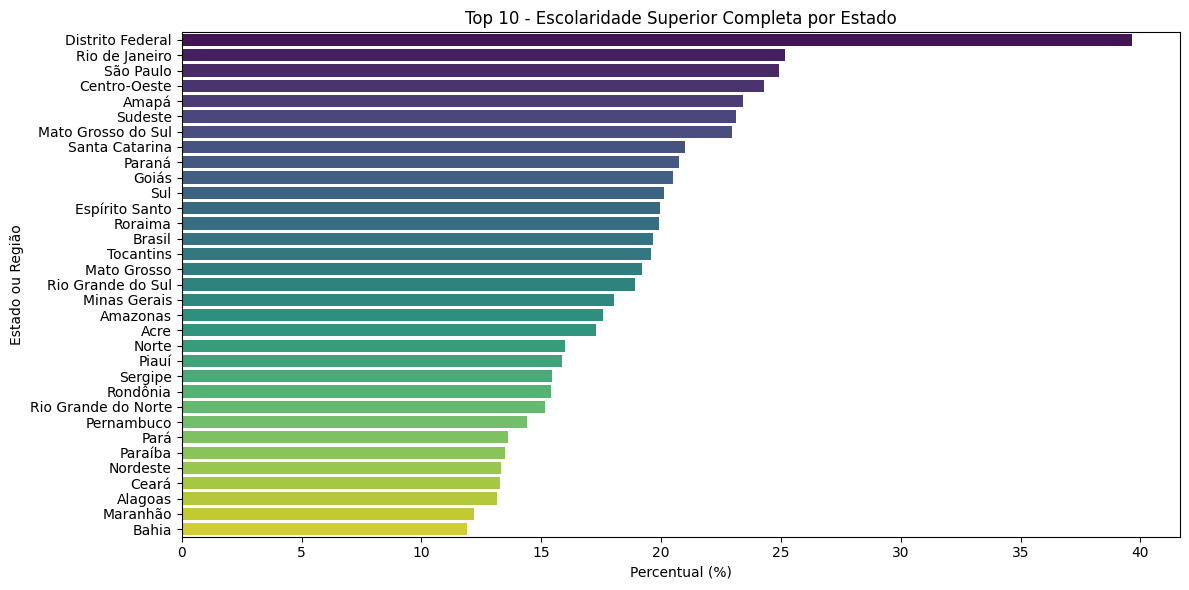

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=ranking, 
    x='Ensino superior completo', 
    y='Regiao_UF', 
    hue='Regiao_UF',         
    legend=False,            
    palette='viridis'        
)
plt.title('Top 10 - Escolaridade Superior Completa por Estado')
plt.xlabel('Percentual (%)')
plt.ylabel('Estado ou Região')
plt.tight_layout()
plt.savefig('grafico_superior_completo.png')
plt.show()

📌 6. Conclusões

6.1.Quais estados estão melhor posicionados

6.2.Quais estão em desvantagem

6.3.Ideias para políticas públicas